In [1]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
emissions_canada=pd.read_csv("CO2 Emissions_Canada.xls")
emissions_canada

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [7]:
emissions_canada.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [15]:
new_columns = [col.replace(" ", "_") for col in emissions_canada.columns]
emissions_canada.columns = new_columns

In [43]:
emissions_canada.head()

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb_(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [29]:
emissions_canada.shape

(7385, 12)

In [47]:
emissions_canada[["Engine_Size(L)", "Cylinders", "Fuel_Consumption_City_(L/100_km)","CO2_Emissions(g/km)"]].describe()

# As we can see, the CO2_Emissions(g/km) has the highest variability, which we can related with fuel consumption, size of engine and cylinders.
# They are correlated.

,Engine_Size(L),Cylinders,Fuel_Consumption_City_(L/100_km),CO2_Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,250.584699
std,1.354170,1.828307,3.500274,58.512679
min,0.900000,3.000000,4.200000,96.000000
25%,2.000000,4.000000,10.100000,208.000000
50%,3.000000,6.000000,12.100000,246.000000
75%,3.700000,6.000000,14.600000,288.000000
max,8.400000,16.000000,30.600000,522.000000


In [33]:
emissions_canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle_Class                     7385 non-null   object 
 3   Engine_Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel_Type                         7385 non-null   object 
 7   Fuel_Consumption_City_(L/100_km)  7385 non-null   float64
 8   Fuel_Consumption_Hwy_(L/100_km)   7385 non-null   float64
 9   Fuel_Consumption_Comb_(L/100_km)  7385 non-null   float64
 10  Fuel_Consumption_Comb_(mpg)       7385 non-null   int64  
 11  CO2_Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [49]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [57]:
emissions_canada["Engine_Size(L)"].corr(emissions_canada["CO2_Emissions(g/km)"])
# the correlations is positive

0.8511446437900013

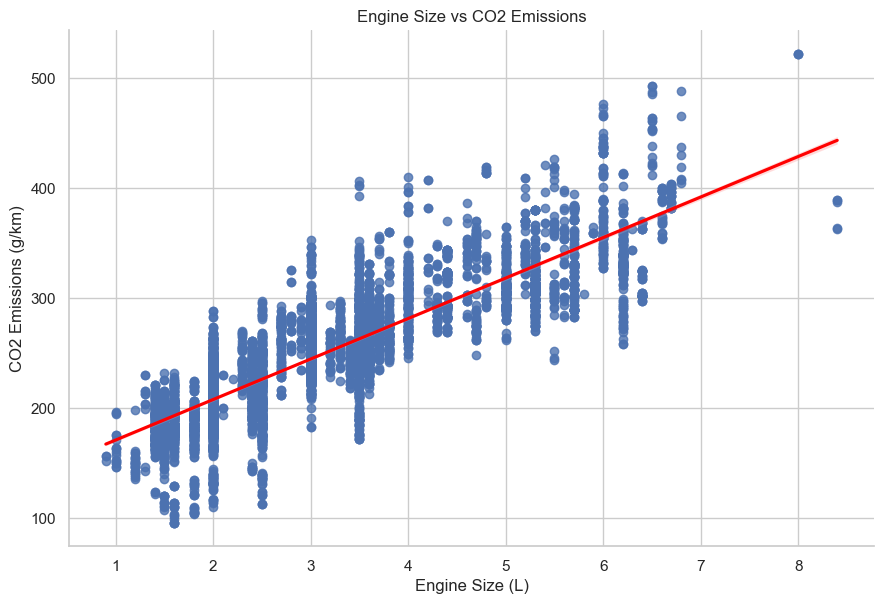

In [59]:
sns.set(style="whitegrid")
sns.lmplot(
    x="Engine_Size(L)",
    y="CO2_Emissions(g/km)",
    data=emissions_canada,
    height=6,
    aspect=1.5,
    line_kws={"color": "red"}
)
plt.title("Engine Size vs CO2 Emissions")
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

# The correlation show to us that once the engine is low, the emission is low but once the engine increases the size the emission increase as well.

In [61]:
emissions_canada["Fuel_Type"] = emissions_canada["Fuel_Type"].replace({
    "X": "Hybrid",
    "Z": "Gasoline"
})
emissions_canada

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb_(mpg),CO2_Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Gasoline,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Gasoline,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Gasoline,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Gasoline,11.2,8.3,9.9,29,232


In [67]:
# H0---There is no difference between mean fuel type between gasoline and hybrid emissions.
# H1---There is difference between mean fuel type between gasoline and hybrid emissions.

from scipy.stats import ttest_ind

hybrid = emissions_canada[emissions_canada["Fuel_Type"] == "Hybrid"]["CO2_Emissions(g/km)"]
gasoline = emissions_canada[emissions_canada["Fuel_Type"] == "Gasoline"]["CO2_Emissions(g/km)"]

mean_hybrid=hybrid.mean()
mean_gasoline=gasoline.mean()
t_stat, p_value = ttest_ind(hybrid, gasoline, equal_var=False)

print(f"Mean hybrid: {mean_hybrid:.2f}")
print(f"Mean gasoline : {mean_gasoline:.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

alpha = 0.05
if p_value < alpha:
    print("Statistically significant difference (Reject HO)")
else:
    print("No statistically significant difference (Fail to reject HO)")


# According with our test we reject the H0 due to the fact the mean are different (Fuel_Type) by emission of CO2.
# It means our first assumption, it is wrong and also in null hypothesis we assume there is no association.
# In alternative hypothesis we assume there is no association.

Mean hybrid: 235.12
Mean gasoline : 266.04
T-statistic: -22.38
P-value: 0.00
Statistically significant difference (Reject HO)


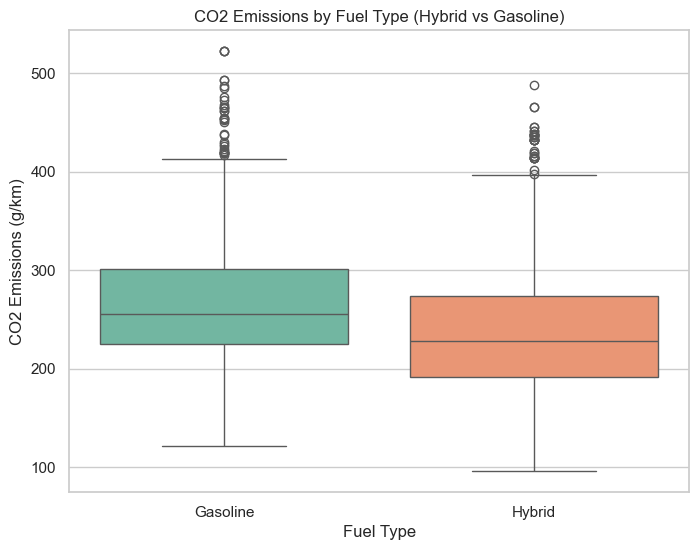

In [83]:
df_filtered = emissions_canada[emissions_canada["Fuel_Type"].isin(["Hybrid", "Gasoline"])]

plt.figure(figsize=(8, 6))
sns.boxplot(x="Fuel_Type", y="CO2_Emissions(g/km)", hue="Fuel_Type", data=df_filtered, palette="Set2", legend=False)


plt.title("CO2 Emissions by Fuel Type (Hybrid vs Gasoline)")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

In [1]:
# Without analysing the data, I can assume the vehicle characteristics are most liked to higher CO2 emissions is Gasoline.
# Since I analyzed the dataset, statistically the mean (gasoline x hybrid) are really close, I would sugggest to analyse for type of Vehicle_Class to see if there is a huge difference or not.
# As far as I am concerned, if the person is looking for a vehicle which has a lower level of CO2 emissions I would say buy a hybrid but if you not interested in that, I might recommend you to analyse how much each vehicle does by kilometer per litter and after all, take a decision.
# I pressume that transmissions is related to gears (how many) and if they are automatic or manual. I do not believe this dataset contains bias, however, if you are an owner of hybrid factory, you tend to make adds to emphatyse how good to the envinronment is it your cars.

In [ ]:
# Since we have done a statistical test to understand our dataset, even that, it is not enough to came a solid conclusion about it.
# It could be a good insight try to use diffent techniques as an example dimensionality reduction and PCA.
# Also we could have analysed by other features, in average hybrid vehicle it will have a lower CO2 emission but if we compare the other features we have, which result would we have?